In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
def create_world(size):
    print("Grid world with rows =", size,"and cols =",size, "created")
    return np.zeros((size,size))

In [86]:
grid=create_world(4)

Grid world with rows = 4 and cols = 4 created


In [87]:
def two_array(grid,discount):
    goal=[0,0]
    reward=-1
    prob=0.25
    delta=0.01
    actions=[(0,-1),(0,+1),(+1,0),(-1,0)]# move down,move up,move right,move left
    value_fn = np.zeros((grid.shape[0],grid.shape[1]))
    old_value_fn = np.zeros((grid.shape[0],grid.shape[1]))
    p=0
    while True:
        #print(p)
        old_value_fn = value_fn
        value_fn = np.zeros((4,4))
        for row in range(grid.shape[0]):# 0 1 2 3 
            for col in range(grid.shape[1]):
                value=0
                if goal!=[row,col]:
                    for act in range(len(actions)):
                        row_possible=row+actions[act][0]
                        col_possible=col+actions[act][1]

                        if (col_possible<0) or (col_possible>3):
                            #print("cant move left and right")
                            row_possible=row
                            col_possible=col

                        if (row_possible<0) or (row_possible>=3):
                            #print("cant move up or down")
                            row_possible=row
                            col_possible=col
                       # print(row_possible,col_possible)
                        value =value+ 0.25 * (reward + discount * old_value_fn[row_possible, col_possible])
                    value_fn[row,col]=value  
                else:
                    value =value+ 0.25 * (0 + discount * old_value_fn[row, col])
                    #print("goal,val",value)
                    #print("pass",row,col)
                    value_fn[row,col]=value 
                    pass
        change=abs(old_value_fn-value_fn).max()
       # print(change)
        if change< delta:
            break
        p+=1
        #print(value_fn)
    return value_fn,p

In [88]:
val_2a,p_2a=two_array(grid,discount=1)

print("2-Array iterations:",p_2a+1)

2-Array iterations: 173


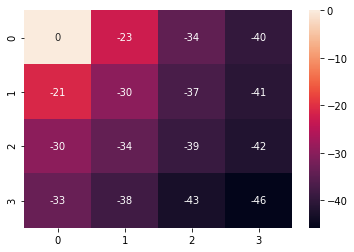

In [89]:
sns.heatmap(val_2a,annot=True)

In [90]:
def one_array(grid,discount):
    goal=[0,0]
    actions=[(0,-1),(0,+1),(+1,0),(-1,0)]# move down,move up,move right,move left
    reward=-1
    prob=0.25
    delta=0.01
    value_fn = np.zeros((grid.shape[0],grid.shape[1]))
   # old_value_fn = np.zeros((grid.shape[0],grid.shape[1]))

    #for p in range(181):
    p=0
    change=1000
    while True:
        #print(p)
        old_value_fn = value_fn
        for row in range(grid.shape[0]):# 0 1 2 3 
            for col in range(grid.shape[1]):
                value=0
                if goal!=[row,col]:
                    for act in range(len(actions)):
                        row_possible=row+actions[act][0]
                        col_possible=col+actions[act][1]

                        if (col_possible<0) or (col_possible>3):
                            #print("cant move left and right")
                            row_possible=row
                            col_possible=col

                        if (row_possible<0) or (row_possible>=3):
                            #print("cant move up or down")
                            row_possible=row
                            col_possible=col
                       # print(row_possible,col_possible)
                        value =value+ 0.25 * (reward + discount * value_fn[row_possible, col_possible])
                    value_fn[row,col]=value  
                    change=abs(old_value_fn-value_fn).max()
                    #print("Here")
                else:
                    value =value+ 0.25 * (0 + discount * value_fn[row, col])
                    #print("goal,val",value)
                    #print("pass",row,col)
                    value_fn[row,col]=value 
                    pass

       # print(change)
        
        if change < delta:
            #print("break")
            break
        #print(value_fn)
        p+=1
    return value_fn,p

In [91]:
val_1,p_1=one_array(grid,discount=1)
val_1
print("2-Array iterations:",p_1+1)

2-Array iterations: 1


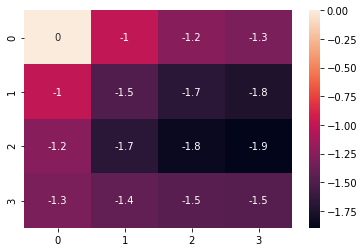

In [92]:
sns.heatmap(val_1,annot=True)

Combined_plot

In [93]:
discount_vals=np.logspace(-0.2,0,num=20)
iter_2D=[]
vals_2D=[]

iter_1D=[]
vals_1D=[]


In [94]:
for dis in discount_vals:
    hold_val,hold_iter=two_array(grid,discount=dis)
    vals_2D.append(hold_val)
    iter_2D.append(hold_iter)
    
    hold_val,hold_iter=one_array(grid,discount=dis)
    vals_1D.append(hold_val)
    iter_1D.append(hold_iter+1)

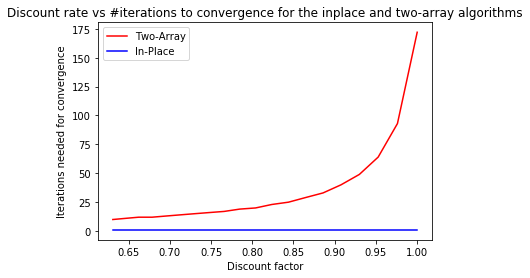

In [95]:
plt.plot(discount_vals,iter_2D,c="r",label="Two-Array")
plt.plot(discount_vals,iter_1D,c="b",label="In-Place")

plt.title("Discount rate vs #iterations to convergence for the inplace and two-array algorithms")
plt.xlabel("Discount factor")
plt.ylabel("Iterations needed for convergence")
plt.legend()